# **Name:- Prasad Thete**
Data Science Intern **at CodeClause**

Name of Project:- **Market Basket Analysis in Python using Apriori Algorithm**

# **Import Libraries.**

In [26]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


# **Reading Data using pandas Library.**

In [27]:
import pandas as pd

file_path = r'C:\Users\PRASAD\OneDrive\Desktop\codeclause_2\Groceries_dataset.csv'
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df'


# **Show First five Rows from Data .**

In [28]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# **Exploring dataset**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [30]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

# **Statistics InFo about data**

In [31]:
df.shape

(38765, 3)

In [32]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


⚫**To Find nan values in data**


In [33]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [34]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [35]:
df.columns.values

array(['Member_number', 'Date', 'itemDescription'], dtype=object)

In [36]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [37]:
df.index=pd.to_datetime(df.index)

In [38]:
df.head()

,Member_number,Date,itemDescription
1970-01-01 00:00:00.000000000,1808,21-07-2015,tropical fruit
1970-01-01 00:00:00.000000001,2552,05-01-2015,whole milk
1970-01-01 00:00:00.000000002,2300,19-09-2015,pip fruit
1970-01-01 00:00:00.000000003,1187,12-12-2015,other vegetables
1970-01-01 00:00:00.000000004,3037,01-02-2015,whole milk


In [39]:
df.shape

(38765, 3)

In [40]:
#gathering information about products
total_item = len(df)
total_days = len(np.unique(df.index.date))
total_months = len(np.unique(df.index.year))
print(total_item,total_days,total_months)

38765 1 1


Total 38765 items sold in 728 days throughout 24 months

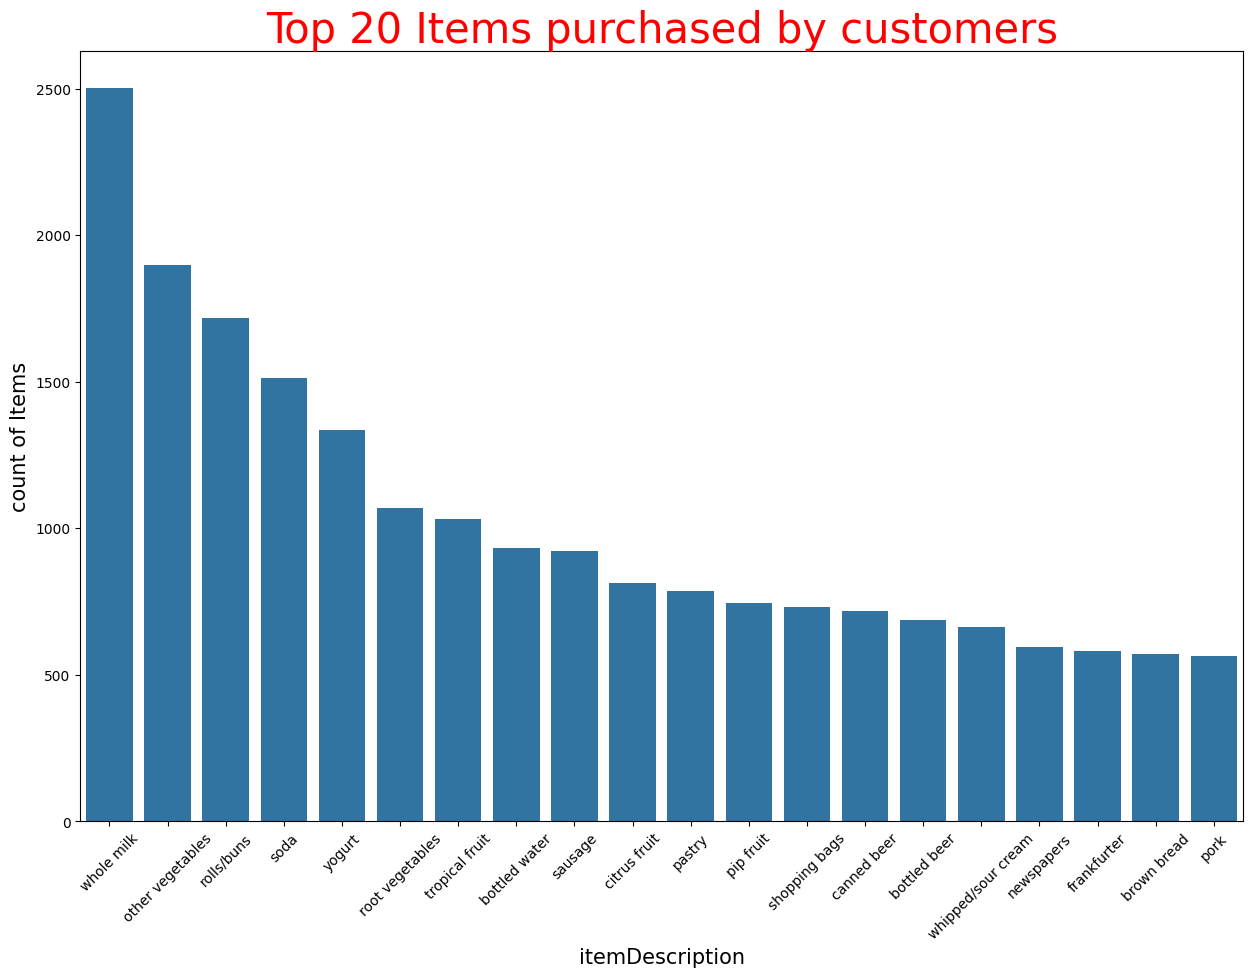

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x = df.itemDescription.value_counts().head(20).index, y = df.itemDescription.value_counts().head(20).values)
plt.xlabel('itemDescription',size = 15)
plt.xticks(rotation=45)
plt.ylabel('count of Items',size = 15)
plt.title('Top 20 Items purchased by customers', color = 'red',size = 30)
plt.show()

In [42]:
df['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

**Products Customers buy the most?**

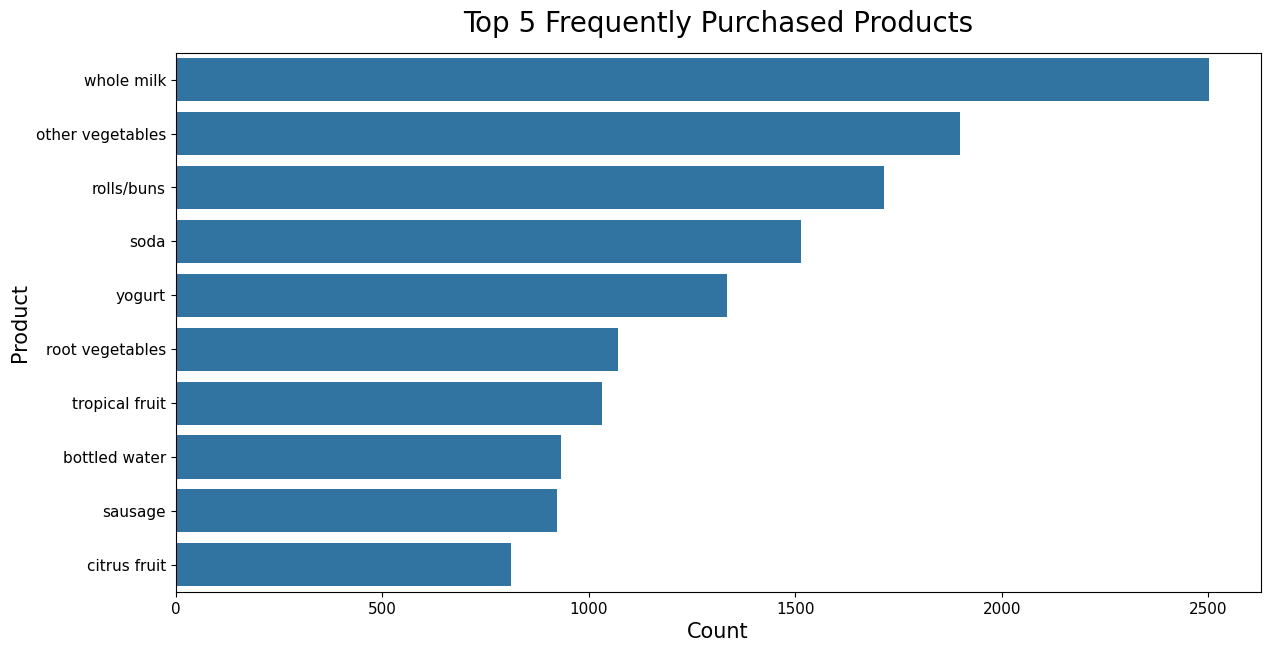

In [43]:
plt.figure(figsize = (14,7))
ax = sns.countplot (y = df['itemDescription'], order = df ["itemDescription"].value_counts().iloc[:10].index)
ax.set_xlabel("Count", size = 15)
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params (labelsize=11) 
ax.yaxis.set_tick_params (labelsize=11)
ax.set_title("Top 5 Frequently Purchased Products",size = 20,pad=15)
plt.show()

# **Apriori Algorithm**

***Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.***

In [44]:
#grouping dataset to form a list of products bought by same date
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [45]:
df.head(10)

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
1001           02-05-2015                                  [frankfurter, curd]
               07-02-2014                    [sausage, whole milk, rolls/buns]
               12-12-2014                                   [whole milk, soda]
               14-04-2015                                  [beef, white bread]
               20-01-2015              [frankfurter, soda, whipped/sour cream]
Name: itemDescription, dtype: object

In [46]:
#apriori takes list as on input , hence converting dataset to a list 
Transactions = df.values.tolist()
Transactions[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [47]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [48]:
from apyori import apriori
rules = apriori(Transactions,min_support=0.00030,min_confidence = 0.05,min_lift = 2,min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'artif. sweetener', 'soda'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'berries', 'condensed milk'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'condensed milk'}), items_add=frozenset({'berries'}), confidence=0.05102040816326531, lift=2.34177413296607)]),
 RelationRecord(items=frozenset({'brandy', 'whole milk'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'butter', 'sweet spreads'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sweet spreads'}), items_add=frozenset({'butter'}), confid

In [49]:
def inspect(results):
  lhs           = [tuple(result[2][0][0])[0] for result in results]
  rhs           = [tuple(result[2][0][1])[0] for result in results]
  supports      = [result[1] for result in results]
  confidences   = [result[2][0][2] for result in results]
  lifts         = [result[2][0][3] for result in results]
  return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results),columns = ['left Hand side', 'Right Hand side', 'support','Confidence','lift'])

In [50]:
ordered_results

,left Hand side,Right Hand side,support,Confidence,lift
0,artif. sweetener,soda,0.000468,0.241379,2.485725
1,condensed milk,berries,0.000334,0.051020,2.341774
2,brandy,whole milk,0.000869,0.342105,2.166281
3,sweet spreads,butter,0.000334,0.073529,2.087705
4,liver loaf,canned beer,0.000401,0.120000,2.557778
...,...,...,...,...,...
99,rolls/buns,yogurt,0.000601,0.204545,2.381800
100,shopping bags,yogurt,0.000401,0.206897,2.409178
101,yogurt,sausage,0.001470,0.131737,2.182917
102,pastry,soda,0.000334,0.090909,7.817659
